# Flower Class Recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
train = pd.read_csv(r'C:\Users\Gaurav Kesari\Flower Class Recognition\train.csv')
print("Train Table Size = ", train.shape)
train.head()

Train Table Size =  (12666, 7)


,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species
0,4694,17,1609,3.0,5.0,7,48
1,781,7,1380,4.0,17.0,2,54
2,21014,6,1122,3.0,11.0,1,22
3,7326,6,556,3.0,34.0,7,25
4,13122,17,1752,5.0,16.0,2,128


In [3]:
y=train.Class

In [4]:
test = pd.read_csv(r'C:\Users\Gaurav Kesari\Flower Class Recognition\test.csv')
print("Test Matrix Size =", test.shape)
test.head()

Test Matrix Size = (29555, 6)


,Area_Code,Locality_Code,Region_Code,Height,Diameter,Species
0,25836,4,903,7.5,8.0,14
1,28544,14,1576,3.0,7.0,48
2,7037,11,350,15.0,57.0,56
3,20460,17,1208,3.0,6.0,180
4,17555,14,994,4.5,22.0,225


In [5]:
train.isnull().sum() 

Area_Code        0
Locality_Code    0
Region_Code      0
Height           0
Diameter         0
Class            0
Species          0
dtype: int64

In [6]:
test.isnull().sum() , test.shape

(Area_Code        0
 Locality_Code    0
 Region_Code      0
 Height           0
 Diameter         0
 Species          0
 dtype: int64,
 (29555, 6))

In [7]:
train.nunique()  ,   train.shape

(Area_Code        10122
 Locality_Code       21
 Region_Code       1870
 Height              92
 Diameter           132
 Class                8
 Species            222
 dtype: int64,
 (12666, 7))

In [8]:
test.nunique(), test.shape

(Area_Code        22331
 Locality_Code       22
 Region_Code       2110
 Height             100
 Diameter           150
 Species            252
 dtype: int64,
 (29555, 6))

In [9]:
data = pd.concat([train, test], ignore_index= True)

In [10]:
data.nunique()

Area_Code        30900
Locality_Code       22
Region_Code       2185
Height             110
Diameter           151
Class                8
Species            263
dtype: int64

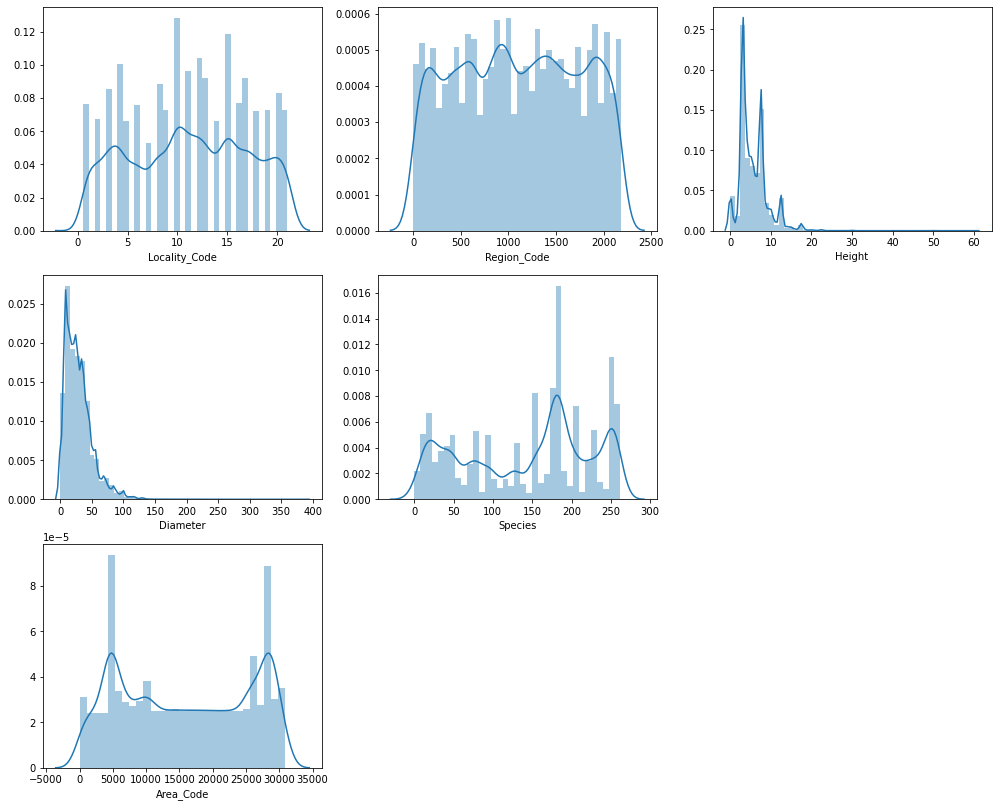

In [11]:
plt.figure(figsize=(17,14))
plt.subplot(3,3,1)
sns.distplot(data.Locality_Code)
plt.subplot(3,3,2)
sns.distplot(data.Region_Code)
plt.subplot(3,3,3)
sns.distplot(data.Height)
plt.subplot(3,3,4)
sns.distplot(data.Diameter)
plt.subplot(3,3,5)
sns.distplot(data.Species)

plt.subplot(3,3,7)
sns.distplot(data.Area_Code)


In [12]:
data.describe()

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species
count,42221.000000,42221.000000,42221.000000,42221.000000,42221.000000,12666.000000,42221.000000
mean,15792.286019,11.102082,1095.366808,5.603955,28.923000,3.632402,143.058170
std,9542.245106,5.847546,630.883045,3.541373,21.479605,2.119160,79.911685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6536.000000,6.000000,564.000000,3.000000,13.000000,2.000000,72.000000
50%,15511.000000,11.000000,1092.000000,5.000000,25.000000,3.000000,171.000000
75%,25449.000000,16.000000,1635.000000,7.500000,39.000000,6.000000,203.000000
max,30899.000000,21.000000,2184.000000,60.000000,387.000000,7.000000,262.000000


In [13]:
def chsk(x):
    sk=x.skew()
    lg=(np.log1p(x)).skew()
    sq=(np.sqrt(x)).skew()
    cb=(np.cbrt(x)).skew()
    
    return {"Skew":sk, "log":lg, "sqrt":sq, "cbrt":cb}

def nor(column):
    upper=column.max()
    lower=column.min()
    y=(column-lower)/(upper-lower)
    
    return y

In [14]:
from IPython.display import display
display(print("1. Area_Code"))
display(chsk(data.Area_Code))
display(print("2. Locality_Code"))
display(chsk(data.Locality_Code))
display(print("3. Region_Code"))
display(chsk(data.Region_Code))
display(print("4. Height"))
display(chsk(data.Height))
display(print("5. Diameter"))
display(chsk(data.Diameter))
display(print("6. Species"))
display(chsk(data.Species))

1. Area_Code


None

{'Skew': 0.022160586716819777,
 'log': -2.1660215576978747,
 'sqrt': -0.45806038910850444,
 'cbrt': -0.7542665663328146}

2. Locality_Code


None

{'Skew': -0.048645521382449805,
 'log': -0.9711584963576941,
 'sqrt': -0.5443577560010198,
 'cbrt': -0.74959769378076}

3. Region_Code


None

{'Skew': -0.008479167505605819,
 'log': -2.56777769499025,
 'sqrt': -0.6176202602569787,
 'cbrt': -1.016278535611942}

4. Height


None

{'Skew': 1.7535810407411287,
 'log': -0.8925010660776167,
 'sqrt': -0.36182814308285827,
 'cbrt': -1.5967163900079646}

5. Diameter


None

{'Skew': 1.4931314254188452,
 'log': -1.270364834356321,
 'sqrt': 0.07535206579268405,
 'cbrt': -0.8319069138846463}

6. Species


None

{'Skew': -0.2619098289617812,
 'log': -1.4954622588415063,
 'sqrt': -0.7004780714884115,
 'cbrt': -0.948864855428657}

In [15]:
d=pd.concat([train, test], ignore_index=True)


In [16]:
d.Height=np.sqrt(d.Height)
d.Diameter=np.sqrt(d.Diameter)
display(print("4. Height"))
display(chsk(d.Height))
display(print("5. Diameter"))
display(chsk(d.Diameter))

4. Height


None

{'Skew': -0.36182814308285827,
 'log': -2.063326056216597,
 'sqrt': -2.411664405012603,
 'cbrt': -3.272722204467302}

5. Diameter


None

{'Skew': 0.07535206579268405,
 'log': -1.8940259732113383,
 'sqrt': -1.6385771053468527,
 'cbrt': -2.8590909277467795}

In [17]:
# d.Locality_Code=nor(d.Locality_Code)
# d.Area_Code=nor(d.Area_Code)
# d.Region_Code=nor(d.Region_Code)
# d.Height=nor(d.Height)
# d.Diameter=nor(d.Diameter)
# d.Species=nor(d.Species)


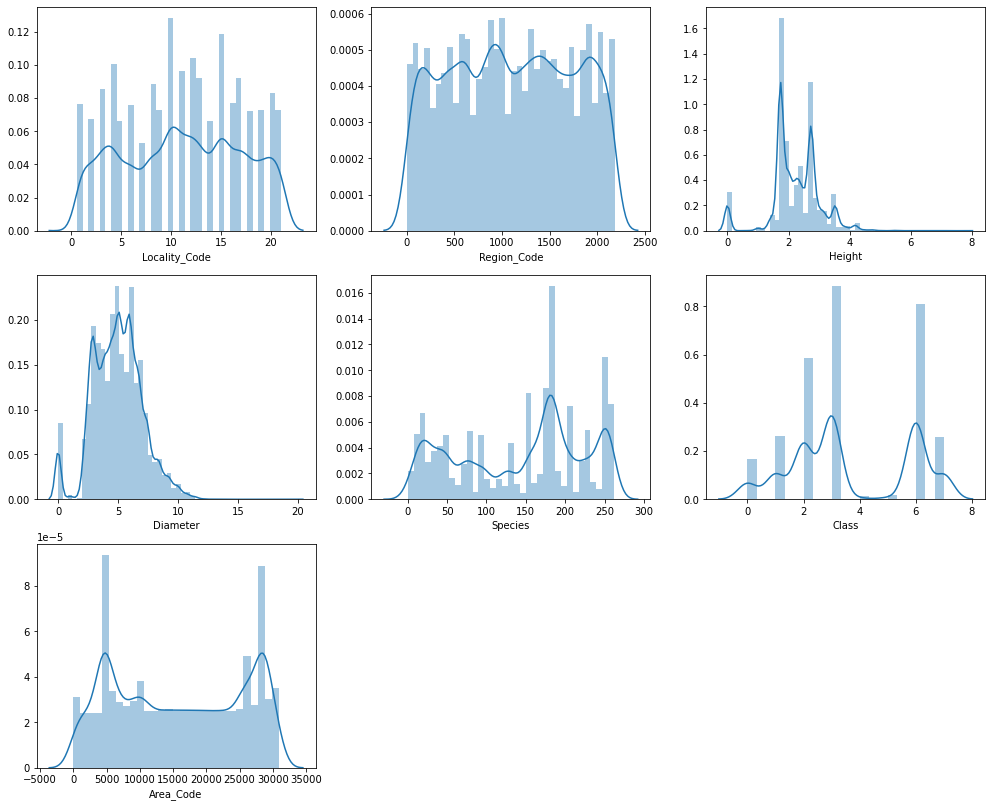

In [18]:
plt.figure(figsize=(17,14))
plt.subplot(3,3,1)
sns.distplot(d.Locality_Code)
plt.subplot(3,3,2)
sns.distplot(d.Region_Code)
plt.subplot(3,3,3)
sns.distplot(d.Height)
plt.subplot(3,3,4)
sns.distplot(d.Diameter)
plt.subplot(3,3,5)
sns.distplot(d.Species)
plt.subplot(3,3,6)
sns.distplot(d.Class)
plt.subplot(3,3,7)
sns.distplot(d.Area_Code)

In [19]:
# d["L*R"]=d.Locality_Code*d.Region_Code
# d["R*A"]=d.Region_Code*d.Area_Code
# d["L*A"]=d.Locality_Code*d.Area_Code
# d["H*D"]=d.Height*d.Diameter
# d["D*S"]=d.Diameter*d.Species
# d["H*S"]=d.Height*d.Species

# d["L*H"]=d.Locality_Code*d.Height
# d["L*D"]=d.Locality_Code*d.Diameter
# d["L*S"]=d.Locality_Code*d.Species

# d["R*S"]=d.Region_Code*d.Species
# d["R*D"]=d.Diameter*d.Region_Code
# d["R*H"]=d.Region_Code*d.Height

# d["A*H"]=d.Area_Code*d.Height
# d["A*S"]=d.Area_Code*d.Species
# d["A*D"]=d.Area_Code*d.Diameter

In [20]:
# d["lr+hd"]=d["L*R"]+d["H*D"]
# d["lr+ds"]=d["L*R"]+d["D*S"]
# d["lr+hs"]=d["L*R"]+d["H*S"]


In [21]:
 d.tail()

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species
42216,20833,1,1170,2.345208,3.316625,NaN,77
42217,28896,12,834,1.732051,3.000000,NaN,156
42218,2193,20,2169,2.738613,5.656854,NaN,49
42219,25195,10,1425,2.828427,5.916080,NaN,28
42220,8711,5,122,2.000000,6.324555,NaN,249


In [22]:
d.shape, train.shape, test.shape

((42221, 7), (12666, 7), (29555, 6))

In [23]:
x_target=d[0:12666]
tst1=d[12666:]
tst=tst1.drop(["Class"], axis=1)

x=x_target.drop(["Class"], axis=1)
tst.isnull().sum(), tst.head(20), x.head()

(Area_Code        0
 Locality_Code    0
 Region_Code      0
 Height           0
 Diameter         0
 Species          0
 dtype: int64,
        Area_Code  Locality_Code  Region_Code    Height   Diameter  Species
 12666      25836              4          903  2.738613   2.828427       14
 12667      28544             14         1576  1.732051   2.645751       48
 12668       7037             11          350  3.872983   7.549834       56
 12669      20460             17         1208  1.732051   2.449490      180
 12670      17555             14          994  2.121320   4.690416      225
 12671      16770             10          219  1.732051   2.236068      130
 12672      28169              1         2049  2.236068   3.741657      128
 12673       8653             19         1374  1.870829   6.633250      156
 12674       5821             15         1207  1.414214   3.162278       20
 12675      14209              6         1349  0.000000   0.000000      257
 12676      15333            

In [24]:
from sklearn import preprocessing, metrics

def get_data_splits(dataframe, valid_fraction=0.1):

#     dataframe = dataframe.sort_values('click_time')
    valid_rows = int(len(dataframe) * valid_fraction)
    train = dataframe[:-valid_rows * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_rows * 2:-valid_rows]
    test = dataframe[-valid_rows:]
    
    return train, valid, test

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

trn, val, _ = get_data_splits(x_target)


logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state =7).fit(x, y)
model = SelectFromModel(logistic, prefit=True)

x_new = model.transform(x)
x_new



array([[4.69400000e+03, 1.70000000e+01, 1.60900000e+03, 1.73205081e+00,
        2.23606798e+00, 4.80000000e+01],
       [7.81000000e+02, 7.00000000e+00, 1.38000000e+03, 2.00000000e+00,
        4.12310563e+00, 5.40000000e+01],
       [2.10140000e+04, 6.00000000e+00, 1.12200000e+03, 1.73205081e+00,
        3.31662479e+00, 2.20000000e+01],
       ...,
       [2.37900000e+03, 1.60000000e+01, 2.17500000e+03, 3.31662479e+00,
        5.47722558e+00, 2.20000000e+01],
       [1.62000000e+04, 1.70000000e+01, 1.43500000e+03, 2.34520788e+00,
        3.74165739e+00, 1.28000000e+02],
       [2.63310000e+04, 1.10000000e+01, 2.10200000e+03, 1.73205081e+00,
        5.00000000e+00, 2.09000000e+02]])

In [26]:
selected_features = pd.DataFrame(model.inverse_transform(x_new), index=x.index, columns=x.columns)
print(selected_features)
selected_columns = selected_features.columns[selected_features.var() !=0]
print(selected_columns)

       Area_Code  Locality_Code  Region_Code    Height  Diameter  Species
0         4694.0           17.0       1609.0  1.732051  2.236068     48.0
1          781.0            7.0       1380.0  2.000000  4.123106     54.0
2        21014.0            6.0       1122.0  1.732051  3.316625     22.0
3         7326.0            6.0        556.0  1.732051  5.830952     25.0
4        13122.0           17.0       1752.0  2.236068  4.000000    128.0
...          ...            ...          ...       ...       ...      ...
12661    28137.0           12.0       1133.0  1.732051  4.582576    181.0
12662     1524.0           12.0       1455.0  1.732051  4.123106    193.0
12663     2379.0           16.0       2175.0  3.316625  5.477226     22.0
12664    16200.0           17.0       1435.0  2.345208  3.741657    128.0
12665    26331.0           11.0       2102.0  1.732051  5.000000    209.0

[12666 rows x 6 columns]
Index(['Area_Code', 'Locality_Code', 'Region_Code', 'Height', 'Diameter',
       'Spec

In [27]:
print("Depedent Variable Distribution")
print(y.value_counts(normalize=True)*100)


Depedent Variable Distribution
3    29.448918
6    27.040897
2    19.524712
1     8.779409
7     8.621506
0     5.605558
5     0.552661
4     0.426338
Name: Class, dtype: float64


In [28]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE



levels = [2,4,6]
for a in levels:
    pca = PCA(n_components=a)
    fit = pca.fit(train)

    print(("{} Components \nExplained Variance: {}\n").format(a, fit.explained_variance_ratio_))
    #print(fit.components_)

2 Components 
Explained Variance: [0.99556857 0.00435589]

4 Components 
Explained Variance: [9.95568572e-01 4.35588569e-03 6.99178550e-05 5.14052098e-06]

6 Components 
Explained Variance: [9.95568572e-01 4.35588569e-03 6.99178550e-05 5.14052098e-06
 3.67608174e-07 6.84194720e-08]



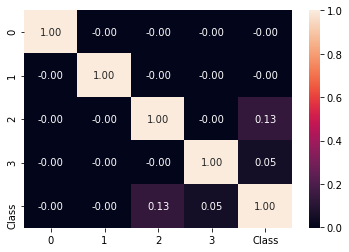

In [29]:
Class = train['Class']
# Reduce Dimensionality
pca = PCA(n_components=4)
fit = pca.fit(x)

sns.heatmap(pd.concat([pd.DataFrame(fit.transform(x)), y],
                      axis=1).corr(), annot=True, fmt=".2f")
# Apply Reduction
x = pd.DataFrame(fit.transform(x))
tst = pd.DataFrame(fit.transform(tst))


# No longer applied to dataset since performance did not get substancially improved.
# Better just use method at an individual basis, through the pipeline method.

In [30]:
# x= x.drop(["R*A", "L*A","R*S", "A*S"], axis=1)
# tst=tst.drop(["R*A", "L*A","R*S", "A*S"], axis=1)
tst.head()

,0,1,2,3
0,-10045.035506,198.042235,128.215139,6.756855
1,-12753.028016,-474.930419,92.957955,-2.745064
2,8753.970079,751.125130,90.037992,-0.379038
3,-4669.006608,-106.762195,-37.250512,-5.703663
4,-1763.999606,107.298110,-81.501479,-2.779569


In [31]:
Class.isnull().sum()

0

In [32]:
# sns.pairplot(x)

In [33]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



from catboost import CatBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score , RepeatedStratifiedKFold



from bayes_opt import BayesianOptimization
from bayes_opt.util import Colours



In [34]:
from numpy import mean
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [35]:
def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse = make_scorer(RMSE, greater_is_better=False)

In [36]:
# from matplotlib import pyplot
# from numpy import where
# from collections import Counter

# # model=CatBoostClassifier()
# # over = SMOTE(sampling_strategy=0.1)
# # under = RandomUnderSampler(sampling_strategy=0.5)
# # steps= [('over', SMOTE()), ('model',model)]
# # pipeline=Pipeline(steps=steps)

# # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # scores = cross_val_score(pipeline, x ,y, scoring=rmse, cv=cv, n_jobs=-1)
# # print('Mean ROC AUC: %.3f' %mean(scores))

# counter=Counter(y)
# print(counter)

# for label, _ in counter.items():
#     row_ix = where(y == label)[0]
#     pyplot.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label))
# pyplot.legend()
# pyplot.show()



In [37]:
# #Hyperparameter tuning of extratrees Regressor using Bayesian optimization

# def etc_cv(n_estimators, min_samples_split, max_features, data, targets):
#     estimator = ExtraTreesClassifier(
#         n_estimators=n_estimators,
#         min_samples_split=min_samples_split,
#         max_features=max_features,
#         random_state=2,
#         n_jobs = -1
#     )
#     cval = cross_val_score(estimator, data, targets,
#                            scoring=rmse, cv=5)
#     return cval.mean()

In [38]:
# def optimize_etc(data, targets):
#     def etc_crossval(n_estimators, min_samples_split, max_features):
#         return etc_cv(
#             n_estimators=int(n_estimators),
#             min_samples_split=int(min_samples_split),
#             max_features=max(min(max_features, 0.999), 1e-3),
#             data=data,
#             targets=targets,
#         )

#     optimizer = BayesianOptimization(
#         f=etc_crossval,
#         pbounds={
#             "n_estimators": (200, 1000),
#             "min_samples_split": (2, 25),
#             "max_features": (0.1, 0.999),
#         },
#         random_state=1234,
#         verbose=2
#     )
#     optimizer.maximize(n_iter=15, init_points=10)

#     print("Final result:", optimizer.max)

In [39]:
# print(Colours.yellow("--- Optimizing Extra Trees ---"))
# optimize_etc(x, y)

In [40]:
etc=ExtraTreesClassifier(n_estimators=int(256.69126084696325), min_samples_split=int(10.265792906161343), max_features=0.995793672197714, n_jobs=-1, random_state=2)

In [41]:
#Hyperparameter tuning of LightGBM Regressor using Bayesian optimization

# def lgb_cv(n_estimators, num_leaves, min_child_samples, subsample, data, targets):
#     estimator = LGBMClassifier(
#         n_estimators=n_estimators,
#         num_leaves = num_leaves,
#         min_child_samples=min_child_samples,
#         subsample = subsample,
#         random_state = 2
#     )
#     cval = cross_val_score(estimator, data, targets,
#                            scoring=rmse, cv=5)
#     return cval.mean()

In [42]:
# def optimize_lgb(data, targets):
#     def lgb_crossval(n_estimators, num_leaves, min_child_samples, subsample):
#         return lgb_cv(
#             n_estimators=int(n_estimators),
#             num_leaves = int(num_leaves),
#             min_child_samples=int(min_child_samples),
#             subsample=subsample,
#             data=data,
#             targets=targets,
#         )

#     optimizer = BayesianOptimization(
#         f=lgb_crossval,
#         pbounds={
#             "n_estimators": (200,1000),
#             "num_leaves": (30,80),
#             "min_child_samples": (5,30),
#             "subsample": (0.6,1.0)
#         },
#         random_state=1234,
#         verbose=2
#     )
#     optimizer.maximize(n_iter=15, init_points=10)

#     print("Final result:", optimizer.max)

In [43]:
# print(Colours.blue("--- Optimizing Light GBM ---"))
# optimize_lgb(x, y)

In [44]:
lgb = LGBMClassifier(
        n_estimators=int(386.6),
        num_leaves = int(51.89),
        min_child_samples=int(9.788),
        subsample = 0.9141,
#         random_state = 2
    )

In [45]:
# #Hyperparameter tuning of XGBoost RandomForest Regressor using Bayesian optimization

# def xgb_cv(n_estimators, max_depth, gamma, min_child_weight, subsample, data, targets):
#     estimator = XGBRFClassifier(
#         n_estimators=n_estimators,
#         max_depth = max_depth,
#         gamma = gamma,
#         min_child_weight=min_child_weight,
#         subsample = subsample,
#         random_state = 2,
#     )
#     cval = cross_val_score(estimator, data, targets,
#                            scoring=rmse, cv=5)
#     return cval.mean()

In [46]:
# def optimize_xgb(data, targets):
#     def xgb_crossval(n_estimators, max_depth, gamma, min_child_weight, subsample):
#         return xgb_cv(
#             n_estimators=int(n_estimators),
#             max_depth = int(max_depth),
#             gamma = gamma,
#             min_child_weight=min_child_weight,
#             subsample=subsample,
#             data=data,
#             targets=targets,
#         )

#     optimizer = BayesianOptimization(
#         f=xgb_crossval,
#         pbounds={
#             "n_estimators": (200, 500),
#             "max_depth": (6,15),
#             "gamma": (0,10),
#             "min_child_weight": (0,10),
#             "subsample": (0.6,1.0)
#         },
#         random_state=1234,
#         verbose=2
#     )
#     optimizer.maximize(n_iter=10, init_points=5)

#     print("Final result:", optimizer.max)

In [47]:
# print(Colours.red("--- Optimizing XGBoost RandomForest ---"))
# optimize_xgb(x, y)

In [48]:
# xgbrf = XGBRFClassifier(
#         n_estimators=int(435.6),
#         max_depth = int(11.6),
#         gamma = 1.915,
#         min_child_weight=4.377,
#         subsample = 0.912,
# #         random_state = 2,
#     )

In [49]:
# def get_models():
#     models =dict()
#     models['lr']=LogisticRegression()
#     models['knn']=KNeighborsClassifier()
#     models['dtc']=DecisionTreeClassifier()
#     models['svm']=SVC()
#     models['bayes']=GaussianNB()
#     models['xgb']=XGBClassifier()
#     models['xgbrf']=XGBRFClassifier()
#     models['rf']=RandomForestClassifier()
#     models['lgm']=LGBMClassifier()
#     models['etc']=ExtraTreesClassifier()
#     models['bc']=BaggingClassifier()
#     return models

In [50]:
# def evaluate_model(model, x, y):
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
#     scores = cross_val_score(model, x, y, scoring= "accuracy", cv=cv, n_jobs=-1, error_score='raise')
#     return scores

In [51]:
# from numpy import mean
# from numpy import std

# models=get_models()

# results, names =list(), list()

# for name, model in models.items():
#     scores=evaluate_model(model, x, y)
#     results.append(scores)
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    


In [52]:
cat=CatBoostClassifier()


In [53]:
estimators=[("etc",etc), ("lgb",lgb), ("cat",cat)]

In [54]:
reg = StackingClassifier(estimators=estimators)

In [56]:
# scores=cross_val_score(reg, x, y, cv = 2, scoring = rmse)
# scores.mean()

In [57]:
reg.fit(x,y)

Learning rate set to 0.090065
0:	learn: 1.9854978	total: 332ms	remaining: 5m 31s
1:	learn: 1.9159089	total: 368ms	remaining: 3m 3s
2:	learn: 1.8585347	total: 396ms	remaining: 2m 11s
3:	learn: 1.8103676	total: 422ms	remaining: 1m 45s
4:	learn: 1.7668368	total: 451ms	remaining: 1m 29s
5:	learn: 1.7298177	total: 482ms	remaining: 1m 19s
6:	learn: 1.7017336	total: 508ms	remaining: 1m 12s
7:	learn: 1.6777057	total: 553ms	remaining: 1m 8s
8:	learn: 1.6544468	total: 606ms	remaining: 1m 6s
9:	learn: 1.6328589	total: 646ms	remaining: 1m 3s
10:	learn: 1.6153946	total: 685ms	remaining: 1m 1s
11:	learn: 1.5986971	total: 731ms	remaining: 1m
12:	learn: 1.5842453	total: 758ms	remaining: 57.5s
13:	learn: 1.5724577	total: 783ms	remaining: 55.2s
14:	learn: 1.5614803	total: 807ms	remaining: 53s
15:	learn: 1.5512129	total: 836ms	remaining: 51.4s
16:	learn: 1.5420458	total: 875ms	remaining: 50.6s
17:	learn: 1.5342807	total: 917ms	remaining: 50s
18:	learn: 1.5248629	total: 979ms	remaining: 50.6s
19:	learn: 1

163:	learn: 1.3043643	total: 5.73s	remaining: 29.2s
164:	learn: 1.3037002	total: 5.75s	remaining: 29.1s
165:	learn: 1.3030892	total: 5.77s	remaining: 29s
166:	learn: 1.3024361	total: 5.79s	remaining: 28.9s
167:	learn: 1.3014813	total: 5.83s	remaining: 28.9s
168:	learn: 1.3002869	total: 5.87s	remaining: 28.9s
169:	learn: 1.2996477	total: 5.91s	remaining: 28.9s
170:	learn: 1.2987962	total: 5.94s	remaining: 28.8s
171:	learn: 1.2977431	total: 5.96s	remaining: 28.7s
172:	learn: 1.2969155	total: 5.99s	remaining: 28.7s
173:	learn: 1.2965198	total: 6.02s	remaining: 28.6s
174:	learn: 1.2957258	total: 6.05s	remaining: 28.5s
175:	learn: 1.2948492	total: 6.07s	remaining: 28.4s
176:	learn: 1.2944108	total: 6.09s	remaining: 28.3s
177:	learn: 1.2935832	total: 6.12s	remaining: 28.3s
178:	learn: 1.2929667	total: 6.15s	remaining: 28.2s
179:	learn: 1.2922282	total: 6.17s	remaining: 28.1s
180:	learn: 1.2917374	total: 6.19s	remaining: 28s
181:	learn: 1.2910179	total: 6.22s	remaining: 27.9s
182:	learn: 1.29

322:	learn: 1.2098152	total: 10.1s	remaining: 21.2s
323:	learn: 1.2093531	total: 10.1s	remaining: 21.1s
324:	learn: 1.2089971	total: 10.2s	remaining: 21.1s
325:	learn: 1.2086122	total: 10.2s	remaining: 21s
326:	learn: 1.2080175	total: 10.2s	remaining: 21s
327:	learn: 1.2073932	total: 10.2s	remaining: 20.9s
328:	learn: 1.2068778	total: 10.2s	remaining: 20.9s
329:	learn: 1.2061592	total: 10.3s	remaining: 20.9s
330:	learn: 1.2057660	total: 10.3s	remaining: 20.8s
331:	learn: 1.2053317	total: 10.3s	remaining: 20.8s
332:	learn: 1.2048519	total: 10.4s	remaining: 20.8s
333:	learn: 1.2042206	total: 10.4s	remaining: 20.8s
334:	learn: 1.2037788	total: 10.4s	remaining: 20.7s
335:	learn: 1.2034153	total: 10.5s	remaining: 20.7s
336:	learn: 1.2030692	total: 10.5s	remaining: 20.6s
337:	learn: 1.2024447	total: 10.5s	remaining: 20.6s
338:	learn: 1.2015580	total: 10.5s	remaining: 20.6s
339:	learn: 1.2007001	total: 10.6s	remaining: 20.5s
340:	learn: 1.2003260	total: 10.6s	remaining: 20.5s
341:	learn: 1.19

481:	learn: 1.1422392	total: 15.2s	remaining: 16.3s
482:	learn: 1.1418841	total: 15.2s	remaining: 16.3s
483:	learn: 1.1415639	total: 15.2s	remaining: 16.2s
484:	learn: 1.1411354	total: 15.3s	remaining: 16.2s
485:	learn: 1.1409739	total: 15.3s	remaining: 16.2s
486:	learn: 1.1404951	total: 15.3s	remaining: 16.1s
487:	learn: 1.1401897	total: 15.3s	remaining: 16.1s
488:	learn: 1.1398918	total: 15.4s	remaining: 16s
489:	learn: 1.1394080	total: 15.4s	remaining: 16s
490:	learn: 1.1391107	total: 15.4s	remaining: 16s
491:	learn: 1.1386464	total: 15.5s	remaining: 16s
492:	learn: 1.1382087	total: 15.5s	remaining: 15.9s
493:	learn: 1.1377292	total: 15.5s	remaining: 15.9s
494:	learn: 1.1374361	total: 15.5s	remaining: 15.8s
495:	learn: 1.1370943	total: 15.6s	remaining: 15.8s
496:	learn: 1.1367600	total: 15.6s	remaining: 15.8s
497:	learn: 1.1362935	total: 15.6s	remaining: 15.8s
498:	learn: 1.1358526	total: 15.7s	remaining: 15.7s
499:	learn: 1.1354933	total: 15.7s	remaining: 15.7s
500:	learn: 1.135140

641:	learn: 1.0893058	total: 20.6s	remaining: 11.5s
642:	learn: 1.0890071	total: 20.7s	remaining: 11.5s
643:	learn: 1.0887322	total: 20.7s	remaining: 11.4s
644:	learn: 1.0884299	total: 20.7s	remaining: 11.4s
645:	learn: 1.0880953	total: 20.8s	remaining: 11.4s
646:	learn: 1.0877683	total: 20.8s	remaining: 11.3s
647:	learn: 1.0874397	total: 20.8s	remaining: 11.3s
648:	learn: 1.0871315	total: 20.9s	remaining: 11.3s
649:	learn: 1.0869428	total: 20.9s	remaining: 11.3s
650:	learn: 1.0865870	total: 20.9s	remaining: 11.2s
651:	learn: 1.0863142	total: 21s	remaining: 11.2s
652:	learn: 1.0860957	total: 21s	remaining: 11.1s
653:	learn: 1.0857577	total: 21s	remaining: 11.1s
654:	learn: 1.0853925	total: 21s	remaining: 11.1s
655:	learn: 1.0850829	total: 21.1s	remaining: 11s
656:	learn: 1.0847447	total: 21.1s	remaining: 11s
657:	learn: 1.0844331	total: 21.1s	remaining: 11s
658:	learn: 1.0841187	total: 21.2s	remaining: 10.9s
659:	learn: 1.0837645	total: 21.2s	remaining: 10.9s
660:	learn: 1.0834685	tota

804:	learn: 1.0416629	total: 26.1s	remaining: 6.33s
805:	learn: 1.0413246	total: 26.2s	remaining: 6.3s
806:	learn: 1.0411018	total: 26.2s	remaining: 6.27s
807:	learn: 1.0408430	total: 26.2s	remaining: 6.24s
808:	learn: 1.0406156	total: 26.3s	remaining: 6.2s
809:	learn: 1.0403470	total: 26.3s	remaining: 6.17s
810:	learn: 1.0400733	total: 26.4s	remaining: 6.14s
811:	learn: 1.0397161	total: 26.4s	remaining: 6.11s
812:	learn: 1.0394721	total: 26.4s	remaining: 6.08s
813:	learn: 1.0393282	total: 26.5s	remaining: 6.05s
814:	learn: 1.0391555	total: 26.5s	remaining: 6.02s
815:	learn: 1.0388303	total: 26.6s	remaining: 5.99s
816:	learn: 1.0385525	total: 26.6s	remaining: 5.96s
817:	learn: 1.0383130	total: 26.6s	remaining: 5.93s
818:	learn: 1.0380046	total: 26.7s	remaining: 5.89s
819:	learn: 1.0376724	total: 26.7s	remaining: 5.86s
820:	learn: 1.0373750	total: 26.7s	remaining: 5.83s
821:	learn: 1.0370766	total: 26.8s	remaining: 5.8s
822:	learn: 1.0367855	total: 26.8s	remaining: 5.76s
823:	learn: 1.0

966:	learn: 1.0003981	total: 31.5s	remaining: 1.07s
967:	learn: 1.0002366	total: 31.6s	remaining: 1.04s
968:	learn: 1.0000620	total: 31.6s	remaining: 1.01s
969:	learn: 0.9999101	total: 31.6s	remaining: 978ms
970:	learn: 0.9997428	total: 31.7s	remaining: 945ms
971:	learn: 0.9995596	total: 31.7s	remaining: 912ms
972:	learn: 0.9993164	total: 31.7s	remaining: 880ms
973:	learn: 0.9990995	total: 31.7s	remaining: 847ms
974:	learn: 0.9989454	total: 31.8s	remaining: 814ms
975:	learn: 0.9986385	total: 31.8s	remaining: 782ms
976:	learn: 0.9984781	total: 31.8s	remaining: 749ms
977:	learn: 0.9982107	total: 31.8s	remaining: 716ms
978:	learn: 0.9979843	total: 31.9s	remaining: 683ms
979:	learn: 0.9978075	total: 31.9s	remaining: 651ms
980:	learn: 0.9975866	total: 31.9s	remaining: 618ms
981:	learn: 0.9974605	total: 31.9s	remaining: 586ms
982:	learn: 0.9972196	total: 32s	remaining: 553ms
983:	learn: 0.9970263	total: 32s	remaining: 520ms
984:	learn: 0.9967734	total: 32s	remaining: 488ms
985:	learn: 0.9965

127:	learn: 1.3271639	total: 3.97s	remaining: 27.1s
128:	learn: 1.3261506	total: 4.01s	remaining: 27.1s
129:	learn: 1.3254234	total: 4.05s	remaining: 27.1s
130:	learn: 1.3246581	total: 4.11s	remaining: 27.2s
131:	learn: 1.3236950	total: 4.15s	remaining: 27.3s
132:	learn: 1.3228266	total: 4.2s	remaining: 27.4s
133:	learn: 1.3216641	total: 4.22s	remaining: 27.3s
134:	learn: 1.3205780	total: 4.26s	remaining: 27.3s
135:	learn: 1.3201193	total: 4.29s	remaining: 27.3s
136:	learn: 1.3188088	total: 4.32s	remaining: 27.2s
137:	learn: 1.3181323	total: 4.36s	remaining: 27.2s
138:	learn: 1.3171500	total: 4.39s	remaining: 27.2s
139:	learn: 1.3165818	total: 4.42s	remaining: 27.2s
140:	learn: 1.3156759	total: 4.45s	remaining: 27.1s
141:	learn: 1.3145429	total: 4.48s	remaining: 27.1s
142:	learn: 1.3136885	total: 4.51s	remaining: 27s
143:	learn: 1.3126154	total: 4.54s	remaining: 27s
144:	learn: 1.3115923	total: 4.59s	remaining: 27s
145:	learn: 1.3106719	total: 4.61s	remaining: 27s
146:	learn: 1.3098632

288:	learn: 1.2122427	total: 9.55s	remaining: 23.5s
289:	learn: 1.2117479	total: 9.58s	remaining: 23.5s
290:	learn: 1.2109924	total: 9.61s	remaining: 23.4s
291:	learn: 1.2104622	total: 9.64s	remaining: 23.4s
292:	learn: 1.2096400	total: 9.67s	remaining: 23.3s
293:	learn: 1.2092560	total: 9.69s	remaining: 23.3s
294:	learn: 1.2088786	total: 9.73s	remaining: 23.2s
295:	learn: 1.2080815	total: 9.76s	remaining: 23.2s
296:	learn: 1.2076237	total: 9.79s	remaining: 23.2s
297:	learn: 1.2071084	total: 9.82s	remaining: 23.1s
298:	learn: 1.2065036	total: 9.84s	remaining: 23.1s
299:	learn: 1.2058672	total: 9.87s	remaining: 23s
300:	learn: 1.2052042	total: 9.91s	remaining: 23s
301:	learn: 1.2046304	total: 9.94s	remaining: 23s
302:	learn: 1.2041217	total: 9.97s	remaining: 22.9s
303:	learn: 1.2037025	total: 9.99s	remaining: 22.9s
304:	learn: 1.2029737	total: 10s	remaining: 22.9s
305:	learn: 1.2026426	total: 10.1s	remaining: 22.8s
306:	learn: 1.2023076	total: 10.1s	remaining: 22.8s
307:	learn: 1.201569

450:	learn: 1.1338981	total: 14.5s	remaining: 17.7s
451:	learn: 1.1335575	total: 14.6s	remaining: 17.7s
452:	learn: 1.1330676	total: 14.6s	remaining: 17.6s
453:	learn: 1.1326128	total: 14.6s	remaining: 17.6s
454:	learn: 1.1322919	total: 14.7s	remaining: 17.6s
455:	learn: 1.1317863	total: 14.7s	remaining: 17.5s
456:	learn: 1.1313817	total: 14.7s	remaining: 17.5s
457:	learn: 1.1308921	total: 14.7s	remaining: 17.4s
458:	learn: 1.1305763	total: 14.8s	remaining: 17.4s
459:	learn: 1.1301604	total: 14.8s	remaining: 17.4s
460:	learn: 1.1297448	total: 14.8s	remaining: 17.3s
461:	learn: 1.1293187	total: 14.8s	remaining: 17.3s
462:	learn: 1.1290548	total: 14.9s	remaining: 17.2s
463:	learn: 1.1284636	total: 14.9s	remaining: 17.2s
464:	learn: 1.1280856	total: 14.9s	remaining: 17.2s
465:	learn: 1.1277977	total: 15s	remaining: 17.1s
466:	learn: 1.1274608	total: 15s	remaining: 17.1s
467:	learn: 1.1270385	total: 15s	remaining: 17.1s
468:	learn: 1.1264764	total: 15s	remaining: 17s
469:	learn: 1.1260130	

610:	learn: 1.0719768	total: 19.5s	remaining: 12.4s
611:	learn: 1.0715459	total: 19.6s	remaining: 12.4s
612:	learn: 1.0713029	total: 19.7s	remaining: 12.4s
613:	learn: 1.0709986	total: 19.7s	remaining: 12.4s
614:	learn: 1.0705561	total: 19.7s	remaining: 12.3s
615:	learn: 1.0703407	total: 19.8s	remaining: 12.3s
616:	learn: 1.0700482	total: 19.8s	remaining: 12.3s
617:	learn: 1.0697072	total: 19.8s	remaining: 12.3s
618:	learn: 1.0693576	total: 19.9s	remaining: 12.2s
619:	learn: 1.0689146	total: 19.9s	remaining: 12.2s
620:	learn: 1.0685625	total: 20s	remaining: 12.2s
621:	learn: 1.0681608	total: 20s	remaining: 12.2s
622:	learn: 1.0676229	total: 20s	remaining: 12.1s
623:	learn: 1.0671503	total: 20.1s	remaining: 12.1s
624:	learn: 1.0667589	total: 20.1s	remaining: 12.1s
625:	learn: 1.0664620	total: 20.1s	remaining: 12s
626:	learn: 1.0661458	total: 20.2s	remaining: 12s
627:	learn: 1.0656548	total: 20.2s	remaining: 12s
628:	learn: 1.0651860	total: 20.2s	remaining: 11.9s
629:	learn: 1.0649049	to

770:	learn: 1.0203281	total: 25.5s	remaining: 7.56s
771:	learn: 1.0201071	total: 25.5s	remaining: 7.53s
772:	learn: 1.0197323	total: 25.5s	remaining: 7.5s
773:	learn: 1.0194377	total: 25.6s	remaining: 7.47s
774:	learn: 1.0190371	total: 25.6s	remaining: 7.43s
775:	learn: 1.0187753	total: 25.6s	remaining: 7.4s
776:	learn: 1.0185577	total: 25.7s	remaining: 7.37s
777:	learn: 1.0182069	total: 25.7s	remaining: 7.33s
778:	learn: 1.0177904	total: 25.7s	remaining: 7.3s
779:	learn: 1.0175361	total: 25.8s	remaining: 7.27s
780:	learn: 1.0171439	total: 25.8s	remaining: 7.23s
781:	learn: 1.0168436	total: 25.8s	remaining: 7.2s
782:	learn: 1.0165442	total: 25.9s	remaining: 7.17s
783:	learn: 1.0162440	total: 25.9s	remaining: 7.14s
784:	learn: 1.0160429	total: 25.9s	remaining: 7.1s
785:	learn: 1.0157203	total: 26s	remaining: 7.07s
786:	learn: 1.0153357	total: 26s	remaining: 7.03s
787:	learn: 1.0149607	total: 26s	remaining: 7s
788:	learn: 1.0146941	total: 26.1s	remaining: 6.97s
789:	learn: 1.0144424	tota

934:	learn: 0.9709672	total: 30.4s	remaining: 2.11s
935:	learn: 0.9706856	total: 30.4s	remaining: 2.08s
936:	learn: 0.9703266	total: 30.4s	remaining: 2.04s
937:	learn: 0.9700385	total: 30.4s	remaining: 2.01s
938:	learn: 0.9697020	total: 30.5s	remaining: 1.98s
939:	learn: 0.9692820	total: 30.5s	remaining: 1.95s
940:	learn: 0.9690642	total: 30.5s	remaining: 1.91s
941:	learn: 0.9686889	total: 30.5s	remaining: 1.88s
942:	learn: 0.9683504	total: 30.6s	remaining: 1.85s
943:	learn: 0.9681925	total: 30.6s	remaining: 1.81s
944:	learn: 0.9679957	total: 30.6s	remaining: 1.78s
945:	learn: 0.9677909	total: 30.6s	remaining: 1.75s
946:	learn: 0.9675647	total: 30.7s	remaining: 1.72s
947:	learn: 0.9672531	total: 30.7s	remaining: 1.68s
948:	learn: 0.9669919	total: 30.7s	remaining: 1.65s
949:	learn: 0.9667546	total: 30.8s	remaining: 1.62s
950:	learn: 0.9664734	total: 30.8s	remaining: 1.58s
951:	learn: 0.9662792	total: 30.8s	remaining: 1.55s
952:	learn: 0.9659690	total: 30.8s	remaining: 1.52s
953:	learn: 

94:	learn: 1.3632284	total: 2.5s	remaining: 23.8s
95:	learn: 1.3621822	total: 2.53s	remaining: 23.9s
96:	learn: 1.3608343	total: 2.59s	remaining: 24.1s
97:	learn: 1.3600574	total: 2.62s	remaining: 24.1s
98:	learn: 1.3590181	total: 2.64s	remaining: 24s
99:	learn: 1.3581151	total: 2.68s	remaining: 24.1s
100:	learn: 1.3568455	total: 2.73s	remaining: 24.3s
101:	learn: 1.3560528	total: 2.75s	remaining: 24.2s
102:	learn: 1.3550141	total: 2.78s	remaining: 24.2s
103:	learn: 1.3541701	total: 2.8s	remaining: 24.1s
104:	learn: 1.3533827	total: 2.83s	remaining: 24.1s
105:	learn: 1.3519024	total: 2.86s	remaining: 24.1s
106:	learn: 1.3507966	total: 2.89s	remaining: 24.1s
107:	learn: 1.3494469	total: 2.92s	remaining: 24.1s
108:	learn: 1.3479738	total: 2.95s	remaining: 24.1s
109:	learn: 1.3470155	total: 2.97s	remaining: 24.1s
110:	learn: 1.3457664	total: 3s	remaining: 24s
111:	learn: 1.3445166	total: 3.02s	remaining: 24s
112:	learn: 1.3440231	total: 3.05s	remaining: 23.9s
113:	learn: 1.3433454	total: 

256:	learn: 1.2341135	total: 9.76s	remaining: 28.2s
257:	learn: 1.2334211	total: 9.84s	remaining: 28.3s
258:	learn: 1.2330546	total: 9.91s	remaining: 28.4s
259:	learn: 1.2324029	total: 9.96s	remaining: 28.4s
260:	learn: 1.2316474	total: 10s	remaining: 28.4s
261:	learn: 1.2308365	total: 10.1s	remaining: 28.4s
262:	learn: 1.2301032	total: 10.1s	remaining: 28.4s
263:	learn: 1.2297404	total: 10.2s	remaining: 28.5s
264:	learn: 1.2291093	total: 10.3s	remaining: 28.5s
265:	learn: 1.2283991	total: 10.3s	remaining: 28.5s
266:	learn: 1.2279207	total: 10.4s	remaining: 28.5s
267:	learn: 1.2273166	total: 10.4s	remaining: 28.5s
268:	learn: 1.2267873	total: 10.5s	remaining: 28.5s
269:	learn: 1.2260605	total: 10.5s	remaining: 28.5s
270:	learn: 1.2258732	total: 10.6s	remaining: 28.5s
271:	learn: 1.2253769	total: 10.6s	remaining: 28.5s
272:	learn: 1.2249147	total: 10.7s	remaining: 28.5s
273:	learn: 1.2244478	total: 10.7s	remaining: 28.4s
274:	learn: 1.2238046	total: 10.8s	remaining: 28.4s
275:	learn: 1.

418:	learn: 1.1540462	total: 15.1s	remaining: 20.9s
419:	learn: 1.1535441	total: 15.1s	remaining: 20.9s
420:	learn: 1.1531788	total: 15.1s	remaining: 20.8s
421:	learn: 1.1527049	total: 15.2s	remaining: 20.8s
422:	learn: 1.1522035	total: 15.2s	remaining: 20.7s
423:	learn: 1.1518972	total: 15.2s	remaining: 20.7s
424:	learn: 1.1516231	total: 15.2s	remaining: 20.6s
425:	learn: 1.1512429	total: 15.2s	remaining: 20.5s
426:	learn: 1.1507701	total: 15.3s	remaining: 20.5s
427:	learn: 1.1503152	total: 15.3s	remaining: 20.4s
428:	learn: 1.1498156	total: 15.3s	remaining: 20.4s
429:	learn: 1.1494200	total: 15.3s	remaining: 20.3s
430:	learn: 1.1486563	total: 15.4s	remaining: 20.3s
431:	learn: 1.1481001	total: 15.4s	remaining: 20.2s
432:	learn: 1.1477327	total: 15.4s	remaining: 20.2s
433:	learn: 1.1471900	total: 15.4s	remaining: 20.1s
434:	learn: 1.1467593	total: 15.4s	remaining: 20.1s
435:	learn: 1.1463256	total: 15.5s	remaining: 20s
436:	learn: 1.1458830	total: 15.5s	remaining: 19.9s
437:	learn: 1.

582:	learn: 1.0883969	total: 18.6s	remaining: 13.3s
583:	learn: 1.0879879	total: 18.6s	remaining: 13.2s
584:	learn: 1.0875085	total: 18.6s	remaining: 13.2s
585:	learn: 1.0872472	total: 18.6s	remaining: 13.2s
586:	learn: 1.0868473	total: 18.6s	remaining: 13.1s
587:	learn: 1.0865943	total: 18.7s	remaining: 13.1s
588:	learn: 1.0863175	total: 18.7s	remaining: 13s
589:	learn: 1.0858205	total: 18.7s	remaining: 13s
590:	learn: 1.0853762	total: 18.7s	remaining: 13s
591:	learn: 1.0851343	total: 18.8s	remaining: 12.9s
592:	learn: 1.0847515	total: 18.8s	remaining: 12.9s
593:	learn: 1.0842773	total: 18.8s	remaining: 12.8s
594:	learn: 1.0839384	total: 18.8s	remaining: 12.8s
595:	learn: 1.0835082	total: 18.9s	remaining: 12.8s
596:	learn: 1.0831790	total: 18.9s	remaining: 12.7s
597:	learn: 1.0828457	total: 18.9s	remaining: 12.7s
598:	learn: 1.0824629	total: 18.9s	remaining: 12.7s
599:	learn: 1.0822051	total: 18.9s	remaining: 12.6s
600:	learn: 1.0818015	total: 19s	remaining: 12.6s
601:	learn: 1.081556

744:	learn: 1.0335816	total: 23s	remaining: 7.87s
745:	learn: 1.0332002	total: 23s	remaining: 7.83s
746:	learn: 1.0329220	total: 23s	remaining: 7.8s
747:	learn: 1.0326083	total: 23s	remaining: 7.76s
748:	learn: 1.0323274	total: 23.1s	remaining: 7.73s
749:	learn: 1.0320182	total: 23.1s	remaining: 7.7s
750:	learn: 1.0317295	total: 23.1s	remaining: 7.67s
751:	learn: 1.0314979	total: 23.2s	remaining: 7.64s
752:	learn: 1.0310747	total: 23.2s	remaining: 7.6s
753:	learn: 1.0306728	total: 23.2s	remaining: 7.57s
754:	learn: 1.0303139	total: 23.2s	remaining: 7.54s
755:	learn: 1.0299786	total: 23.3s	remaining: 7.51s
756:	learn: 1.0297544	total: 23.3s	remaining: 7.47s
757:	learn: 1.0294488	total: 23.3s	remaining: 7.44s
758:	learn: 1.0291201	total: 23.3s	remaining: 7.41s
759:	learn: 1.0287893	total: 23.4s	remaining: 7.38s
760:	learn: 1.0285376	total: 23.4s	remaining: 7.34s
761:	learn: 1.0283055	total: 23.4s	remaining: 7.31s
762:	learn: 1.0279318	total: 23.4s	remaining: 7.27s
763:	learn: 1.0276472	t

908:	learn: 0.9863791	total: 27.1s	remaining: 2.71s
909:	learn: 0.9860258	total: 27.1s	remaining: 2.68s
910:	learn: 0.9858030	total: 27.1s	remaining: 2.65s
911:	learn: 0.9854227	total: 27.2s	remaining: 2.62s
912:	learn: 0.9850990	total: 27.2s	remaining: 2.59s
913:	learn: 0.9847826	total: 27.2s	remaining: 2.56s
914:	learn: 0.9845917	total: 27.2s	remaining: 2.53s
915:	learn: 0.9842930	total: 27.3s	remaining: 2.5s
916:	learn: 0.9840888	total: 27.3s	remaining: 2.47s
917:	learn: 0.9838662	total: 27.3s	remaining: 2.44s
918:	learn: 0.9836230	total: 27.3s	remaining: 2.41s
919:	learn: 0.9833243	total: 27.3s	remaining: 2.38s
920:	learn: 0.9831027	total: 27.4s	remaining: 2.35s
921:	learn: 0.9828333	total: 27.4s	remaining: 2.32s
922:	learn: 0.9826061	total: 27.4s	remaining: 2.29s
923:	learn: 0.9823040	total: 27.4s	remaining: 2.25s
924:	learn: 0.9820330	total: 27.4s	remaining: 2.22s
925:	learn: 0.9816873	total: 27.5s	remaining: 2.19s
926:	learn: 0.9814429	total: 27.5s	remaining: 2.16s
927:	learn: 0

70:	learn: 1.3924919	total: 1.68s	remaining: 22s
71:	learn: 1.3912142	total: 1.7s	remaining: 21.9s
72:	learn: 1.3902267	total: 1.73s	remaining: 22s
73:	learn: 1.3889648	total: 1.75s	remaining: 21.9s
74:	learn: 1.3871665	total: 1.77s	remaining: 21.8s
75:	learn: 1.3857813	total: 1.79s	remaining: 21.8s
76:	learn: 1.3844764	total: 1.81s	remaining: 21.7s
77:	learn: 1.3832644	total: 1.83s	remaining: 21.6s
78:	learn: 1.3819200	total: 1.86s	remaining: 21.7s
79:	learn: 1.3805730	total: 1.88s	remaining: 21.6s
80:	learn: 1.3791901	total: 1.9s	remaining: 21.5s
81:	learn: 1.3771418	total: 1.92s	remaining: 21.5s
82:	learn: 1.3758301	total: 1.94s	remaining: 21.4s
83:	learn: 1.3746307	total: 1.96s	remaining: 21.4s
84:	learn: 1.3737281	total: 1.98s	remaining: 21.3s
85:	learn: 1.3722707	total: 2s	remaining: 21.3s
86:	learn: 1.3714179	total: 2.02s	remaining: 21.2s
87:	learn: 1.3705199	total: 2.06s	remaining: 21.3s
88:	learn: 1.3697330	total: 2.08s	remaining: 21.3s
89:	learn: 1.3684242	total: 2.1s	remaini

233:	learn: 1.2459310	total: 5.25s	remaining: 17.2s
234:	learn: 1.2454836	total: 5.27s	remaining: 17.2s
235:	learn: 1.2442574	total: 5.3s	remaining: 17.2s
236:	learn: 1.2437725	total: 5.32s	remaining: 17.1s
237:	learn: 1.2430538	total: 5.34s	remaining: 17.1s
238:	learn: 1.2422312	total: 5.36s	remaining: 17.1s
239:	learn: 1.2418116	total: 5.38s	remaining: 17s
240:	learn: 1.2412985	total: 5.4s	remaining: 17s
241:	learn: 1.2405892	total: 5.43s	remaining: 17s
242:	learn: 1.2398792	total: 5.45s	remaining: 17s
243:	learn: 1.2392830	total: 5.48s	remaining: 17s
244:	learn: 1.2388103	total: 5.5s	remaining: 16.9s
245:	learn: 1.2381656	total: 5.52s	remaining: 16.9s
246:	learn: 1.2374220	total: 5.54s	remaining: 16.9s
247:	learn: 1.2368820	total: 5.56s	remaining: 16.9s
248:	learn: 1.2362405	total: 5.59s	remaining: 16.9s
249:	learn: 1.2355936	total: 5.63s	remaining: 16.9s
250:	learn: 1.2349326	total: 5.65s	remaining: 16.9s
251:	learn: 1.2344035	total: 5.67s	remaining: 16.8s
252:	learn: 1.2338337	tot

394:	learn: 1.1590874	total: 8.98s	remaining: 13.8s
395:	learn: 1.1585811	total: 9.01s	remaining: 13.7s
396:	learn: 1.1581541	total: 9.03s	remaining: 13.7s
397:	learn: 1.1577195	total: 9.04s	remaining: 13.7s
398:	learn: 1.1574186	total: 9.06s	remaining: 13.7s
399:	learn: 1.1569967	total: 9.08s	remaining: 13.6s
400:	learn: 1.1566817	total: 9.1s	remaining: 13.6s
401:	learn: 1.1564006	total: 9.12s	remaining: 13.6s
402:	learn: 1.1559851	total: 9.15s	remaining: 13.6s
403:	learn: 1.1555131	total: 9.17s	remaining: 13.5s
404:	learn: 1.1551210	total: 9.19s	remaining: 13.5s
405:	learn: 1.1546443	total: 9.21s	remaining: 13.5s
406:	learn: 1.1539057	total: 9.23s	remaining: 13.4s
407:	learn: 1.1534485	total: 9.25s	remaining: 13.4s
408:	learn: 1.1530249	total: 9.26s	remaining: 13.4s
409:	learn: 1.1524604	total: 9.28s	remaining: 13.4s
410:	learn: 1.1518343	total: 9.3s	remaining: 13.3s
411:	learn: 1.1514183	total: 9.33s	remaining: 13.3s
412:	learn: 1.1509631	total: 9.35s	remaining: 13.3s
413:	learn: 1.

561:	learn: 1.0903370	total: 12.7s	remaining: 9.87s
562:	learn: 1.0899208	total: 12.7s	remaining: 9.85s
563:	learn: 1.0896183	total: 12.7s	remaining: 9.82s
564:	learn: 1.0893046	total: 12.7s	remaining: 9.8s
565:	learn: 1.0890411	total: 12.7s	remaining: 9.77s
566:	learn: 1.0888023	total: 12.8s	remaining: 9.74s
567:	learn: 1.0882684	total: 12.8s	remaining: 9.72s
568:	learn: 1.0878662	total: 12.8s	remaining: 9.69s
569:	learn: 1.0873675	total: 12.8s	remaining: 9.67s
570:	learn: 1.0869964	total: 12.8s	remaining: 9.65s
571:	learn: 1.0864688	total: 12.9s	remaining: 9.63s
572:	learn: 1.0859311	total: 12.9s	remaining: 9.6s
573:	learn: 1.0855475	total: 12.9s	remaining: 9.58s
574:	learn: 1.0849005	total: 12.9s	remaining: 9.56s
575:	learn: 1.0844573	total: 12.9s	remaining: 9.53s
576:	learn: 1.0841803	total: 13s	remaining: 9.51s
577:	learn: 1.0838827	total: 13s	remaining: 9.48s
578:	learn: 1.0836324	total: 13s	remaining: 9.46s
579:	learn: 1.0831793	total: 13s	remaining: 9.44s
580:	learn: 1.0827103	

720:	learn: 1.0353519	total: 16s	remaining: 6.2s
721:	learn: 1.0351860	total: 16s	remaining: 6.17s
722:	learn: 1.0348709	total: 16.1s	remaining: 6.15s
723:	learn: 1.0343862	total: 16.1s	remaining: 6.13s
724:	learn: 1.0340356	total: 16.1s	remaining: 6.1s
725:	learn: 1.0337226	total: 16.1s	remaining: 6.08s
726:	learn: 1.0333577	total: 16.1s	remaining: 6.06s
727:	learn: 1.0331114	total: 16.2s	remaining: 6.04s
728:	learn: 1.0328958	total: 16.2s	remaining: 6.01s
729:	learn: 1.0324871	total: 16.2s	remaining: 5.99s
730:	learn: 1.0322404	total: 16.2s	remaining: 5.97s
731:	learn: 1.0317454	total: 16.2s	remaining: 5.94s
732:	learn: 1.0313738	total: 16.3s	remaining: 5.92s
733:	learn: 1.0311618	total: 16.3s	remaining: 5.9s
734:	learn: 1.0308287	total: 16.3s	remaining: 5.87s
735:	learn: 1.0305361	total: 16.3s	remaining: 5.85s
736:	learn: 1.0303032	total: 16.3s	remaining: 5.83s
737:	learn: 1.0299952	total: 16.3s	remaining: 5.8s
738:	learn: 1.0297429	total: 16.4s	remaining: 5.78s
739:	learn: 1.029384

880:	learn: 0.9884771	total: 19.3s	remaining: 2.61s
881:	learn: 0.9882340	total: 19.4s	remaining: 2.59s
882:	learn: 0.9879982	total: 19.4s	remaining: 2.57s
883:	learn: 0.9878163	total: 19.4s	remaining: 2.55s
884:	learn: 0.9875306	total: 19.4s	remaining: 2.52s
885:	learn: 0.9871861	total: 19.5s	remaining: 2.5s
886:	learn: 0.9869867	total: 19.5s	remaining: 2.48s
887:	learn: 0.9867880	total: 19.5s	remaining: 2.46s
888:	learn: 0.9865053	total: 19.5s	remaining: 2.44s
889:	learn: 0.9861681	total: 19.6s	remaining: 2.42s
890:	learn: 0.9858307	total: 19.6s	remaining: 2.4s
891:	learn: 0.9855326	total: 19.6s	remaining: 2.38s
892:	learn: 0.9853244	total: 19.7s	remaining: 2.35s
893:	learn: 0.9852029	total: 19.7s	remaining: 2.33s
894:	learn: 0.9849613	total: 19.7s	remaining: 2.31s
895:	learn: 0.9846812	total: 19.7s	remaining: 2.29s
896:	learn: 0.9843705	total: 19.8s	remaining: 2.27s
897:	learn: 0.9839357	total: 19.8s	remaining: 2.25s
898:	learn: 0.9837401	total: 19.8s	remaining: 2.23s
899:	learn: 0.

40:	learn: 1.4366141	total: 975ms	remaining: 22.8s
41:	learn: 1.4351064	total: 996ms	remaining: 22.7s
42:	learn: 1.4331297	total: 1.02s	remaining: 22.8s
43:	learn: 1.4315057	total: 1.04s	remaining: 22.7s
44:	learn: 1.4298288	total: 1.06s	remaining: 22.6s
45:	learn: 1.4273887	total: 1.08s	remaining: 22.5s
46:	learn: 1.4255974	total: 1.1s	remaining: 22.3s
47:	learn: 1.4241701	total: 1.13s	remaining: 22.3s
48:	learn: 1.4232613	total: 1.16s	remaining: 22.5s
49:	learn: 1.4218793	total: 1.18s	remaining: 22.4s
50:	learn: 1.4196535	total: 1.2s	remaining: 22.3s
51:	learn: 1.4179866	total: 1.22s	remaining: 22.2s
52:	learn: 1.4167074	total: 1.24s	remaining: 22.1s
53:	learn: 1.4146838	total: 1.26s	remaining: 22.1s
54:	learn: 1.4135647	total: 1.28s	remaining: 22s
55:	learn: 1.4122635	total: 1.3s	remaining: 21.9s
56:	learn: 1.4106639	total: 1.33s	remaining: 22s
57:	learn: 1.4081979	total: 1.35s	remaining: 22s
58:	learn: 1.4064625	total: 1.38s	remaining: 21.9s
59:	learn: 1.4054100	total: 1.4s	remaini

201:	learn: 1.2649133	total: 4.48s	remaining: 17.7s
202:	learn: 1.2643594	total: 4.5s	remaining: 17.7s
203:	learn: 1.2634471	total: 4.53s	remaining: 17.7s
204:	learn: 1.2630537	total: 4.55s	remaining: 17.6s
205:	learn: 1.2626464	total: 4.56s	remaining: 17.6s
206:	learn: 1.2620711	total: 4.58s	remaining: 17.6s
207:	learn: 1.2615696	total: 4.6s	remaining: 17.5s
208:	learn: 1.2607139	total: 4.62s	remaining: 17.5s
209:	learn: 1.2599438	total: 4.64s	remaining: 17.5s
210:	learn: 1.2592302	total: 4.67s	remaining: 17.5s
211:	learn: 1.2583651	total: 4.7s	remaining: 17.5s
212:	learn: 1.2580013	total: 4.72s	remaining: 17.4s
213:	learn: 1.2573691	total: 4.74s	remaining: 17.4s
214:	learn: 1.2568347	total: 4.76s	remaining: 17.4s
215:	learn: 1.2562261	total: 4.79s	remaining: 17.4s
216:	learn: 1.2557145	total: 4.8s	remaining: 17.3s
217:	learn: 1.2550299	total: 4.84s	remaining: 17.3s
218:	learn: 1.2540089	total: 4.87s	remaining: 17.4s
219:	learn: 1.2532606	total: 4.89s	remaining: 17.3s
220:	learn: 1.25

361:	learn: 1.1719783	total: 7.69s	remaining: 13.5s
362:	learn: 1.1715809	total: 7.71s	remaining: 13.5s
363:	learn: 1.1712606	total: 7.74s	remaining: 13.5s
364:	learn: 1.1709529	total: 7.75s	remaining: 13.5s
365:	learn: 1.1706283	total: 7.77s	remaining: 13.5s
366:	learn: 1.1701894	total: 7.79s	remaining: 13.4s
367:	learn: 1.1697962	total: 7.81s	remaining: 13.4s
368:	learn: 1.1694775	total: 7.83s	remaining: 13.4s
369:	learn: 1.1690386	total: 7.84s	remaining: 13.4s
370:	learn: 1.1686994	total: 7.87s	remaining: 13.3s
371:	learn: 1.1680992	total: 7.89s	remaining: 13.3s
372:	learn: 1.1677029	total: 7.92s	remaining: 13.3s
373:	learn: 1.1671848	total: 7.93s	remaining: 13.3s
374:	learn: 1.1667522	total: 7.95s	remaining: 13.3s
375:	learn: 1.1664784	total: 7.97s	remaining: 13.2s
376:	learn: 1.1662509	total: 7.99s	remaining: 13.2s
377:	learn: 1.1657266	total: 8s	remaining: 13.2s
378:	learn: 1.1652255	total: 8.02s	remaining: 13.1s
379:	learn: 1.1647102	total: 8.04s	remaining: 13.1s
380:	learn: 1.1

524:	learn: 1.1017949	total: 11s	remaining: 9.96s
525:	learn: 1.1013150	total: 11s	remaining: 9.95s
526:	learn: 1.1010721	total: 11.1s	remaining: 9.92s
527:	learn: 1.1008245	total: 11.1s	remaining: 9.9s
528:	learn: 1.1005311	total: 11.1s	remaining: 9.88s
529:	learn: 1.1000565	total: 11.1s	remaining: 9.86s
530:	learn: 1.0996927	total: 11.1s	remaining: 9.84s
531:	learn: 1.0992873	total: 11.2s	remaining: 9.82s
532:	learn: 1.0986272	total: 11.2s	remaining: 9.8s
533:	learn: 1.0981702	total: 11.2s	remaining: 9.78s
534:	learn: 1.0976297	total: 11.2s	remaining: 9.76s
535:	learn: 1.0973193	total: 11.2s	remaining: 9.73s
536:	learn: 1.0969714	total: 11.3s	remaining: 9.71s
537:	learn: 1.0964209	total: 11.3s	remaining: 9.69s
538:	learn: 1.0960689	total: 11.3s	remaining: 9.67s
539:	learn: 1.0956911	total: 11.3s	remaining: 9.64s
540:	learn: 1.0953077	total: 11.3s	remaining: 9.63s
541:	learn: 1.0948838	total: 11.4s	remaining: 9.62s
542:	learn: 1.0946360	total: 11.4s	remaining: 9.6s
543:	learn: 1.09425

687:	learn: 1.0458955	total: 14.9s	remaining: 6.76s
688:	learn: 1.0455742	total: 14.9s	remaining: 6.74s
689:	learn: 1.0454013	total: 15s	remaining: 6.72s
690:	learn: 1.0450352	total: 15s	remaining: 6.7s
691:	learn: 1.0448023	total: 15s	remaining: 6.68s
692:	learn: 1.0444559	total: 15s	remaining: 6.66s
693:	learn: 1.0440388	total: 15.1s	remaining: 6.64s
694:	learn: 1.0436842	total: 15.1s	remaining: 6.61s
695:	learn: 1.0434158	total: 15.1s	remaining: 6.6s
696:	learn: 1.0431255	total: 15.1s	remaining: 6.58s
697:	learn: 1.0428866	total: 15.1s	remaining: 6.55s
698:	learn: 1.0425834	total: 15.2s	remaining: 6.53s
699:	learn: 1.0421864	total: 15.2s	remaining: 6.51s
700:	learn: 1.0416825	total: 15.2s	remaining: 6.49s
701:	learn: 1.0412523	total: 15.2s	remaining: 6.46s
702:	learn: 1.0408200	total: 15.3s	remaining: 6.44s
703:	learn: 1.0405280	total: 15.3s	remaining: 6.42s
704:	learn: 1.0401221	total: 15.3s	remaining: 6.4s
705:	learn: 1.0396425	total: 15.3s	remaining: 6.38s
706:	learn: 1.0393544	t

850:	learn: 0.9945440	total: 18.6s	remaining: 3.26s
851:	learn: 0.9942473	total: 18.7s	remaining: 3.24s
852:	learn: 0.9941322	total: 18.7s	remaining: 3.22s
853:	learn: 0.9938416	total: 18.7s	remaining: 3.2s
854:	learn: 0.9935391	total: 18.7s	remaining: 3.18s
855:	learn: 0.9932778	total: 18.7s	remaining: 3.15s
856:	learn: 0.9929364	total: 18.8s	remaining: 3.13s
857:	learn: 0.9927996	total: 18.8s	remaining: 3.11s
858:	learn: 0.9924974	total: 18.8s	remaining: 3.09s
859:	learn: 0.9923102	total: 18.8s	remaining: 3.06s
860:	learn: 0.9920162	total: 18.9s	remaining: 3.04s
861:	learn: 0.9916999	total: 18.9s	remaining: 3.02s
862:	learn: 0.9913550	total: 18.9s	remaining: 3s
863:	learn: 0.9910627	total: 18.9s	remaining: 2.98s
864:	learn: 0.9907515	total: 18.9s	remaining: 2.95s
865:	learn: 0.9905051	total: 18.9s	remaining: 2.93s
866:	learn: 0.9902764	total: 19s	remaining: 2.91s
867:	learn: 0.9900179	total: 19s	remaining: 2.89s
868:	learn: 0.9897317	total: 19s	remaining: 2.87s
869:	learn: 0.9894333	

9:	learn: 1.6354615	total: 214ms	remaining: 21.2s
10:	learn: 1.6180898	total: 239ms	remaining: 21.5s
11:	learn: 1.6016861	total: 259ms	remaining: 21.3s
12:	learn: 1.5879401	total: 277ms	remaining: 21s
13:	learn: 1.5761232	total: 296ms	remaining: 20.8s
14:	learn: 1.5650490	total: 314ms	remaining: 20.6s
15:	learn: 1.5545045	total: 332ms	remaining: 20.4s
16:	learn: 1.5449449	total: 352ms	remaining: 20.3s
17:	learn: 1.5364224	total: 370ms	remaining: 20.2s
18:	learn: 1.5267483	total: 399ms	remaining: 20.6s
19:	learn: 1.5200805	total: 420ms	remaining: 20.6s
20:	learn: 1.5124495	total: 438ms	remaining: 20.4s
21:	learn: 1.5047226	total: 456ms	remaining: 20.3s
22:	learn: 1.5001340	total: 475ms	remaining: 20.2s
23:	learn: 1.4946040	total: 494ms	remaining: 20.1s
24:	learn: 1.4904854	total: 512ms	remaining: 20s
25:	learn: 1.4857757	total: 530ms	remaining: 19.9s
26:	learn: 1.4824080	total: 549ms	remaining: 19.8s
27:	learn: 1.4779586	total: 579ms	remaining: 20.1s
28:	learn: 1.4731690	total: 598ms	re

176:	learn: 1.2850657	total: 3.7s	remaining: 17.2s
177:	learn: 1.2845094	total: 3.72s	remaining: 17.2s
178:	learn: 1.2836907	total: 3.74s	remaining: 17.2s
179:	learn: 1.2827848	total: 3.76s	remaining: 17.1s
180:	learn: 1.2821413	total: 3.78s	remaining: 17.1s
181:	learn: 1.2814185	total: 3.8s	remaining: 17.1s
182:	learn: 1.2805527	total: 3.82s	remaining: 17s
183:	learn: 1.2798601	total: 3.84s	remaining: 17s
184:	learn: 1.2790074	total: 3.86s	remaining: 17s
185:	learn: 1.2781836	total: 3.88s	remaining: 17s
186:	learn: 1.2774295	total: 3.91s	remaining: 17s
187:	learn: 1.2765576	total: 3.93s	remaining: 17s
188:	learn: 1.2756763	total: 3.95s	remaining: 16.9s
189:	learn: 1.2748207	total: 3.97s	remaining: 16.9s
190:	learn: 1.2741638	total: 3.99s	remaining: 16.9s
191:	learn: 1.2734852	total: 4.01s	remaining: 16.9s
192:	learn: 1.2729528	total: 4.03s	remaining: 16.8s
193:	learn: 1.2721505	total: 4.04s	remaining: 16.8s
194:	learn: 1.2713193	total: 4.08s	remaining: 16.8s
195:	learn: 1.2705323	tota

336:	learn: 1.1866356	total: 7.81s	remaining: 15.4s
337:	learn: 1.1862138	total: 7.85s	remaining: 15.4s
338:	learn: 1.1854505	total: 7.89s	remaining: 15.4s
339:	learn: 1.1848156	total: 7.93s	remaining: 15.4s
340:	learn: 1.1844528	total: 7.97s	remaining: 15.4s
341:	learn: 1.1839856	total: 8.12s	remaining: 15.6s
342:	learn: 1.1835868	total: 8.17s	remaining: 15.7s
343:	learn: 1.1831736	total: 8.2s	remaining: 15.6s
344:	learn: 1.1824167	total: 8.22s	remaining: 15.6s
345:	learn: 1.1818156	total: 8.26s	remaining: 15.6s
346:	learn: 1.1815248	total: 8.29s	remaining: 15.6s
347:	learn: 1.1811316	total: 8.34s	remaining: 15.6s
348:	learn: 1.1806475	total: 8.37s	remaining: 15.6s
349:	learn: 1.1802518	total: 8.4s	remaining: 15.6s
350:	learn: 1.1797856	total: 8.43s	remaining: 15.6s
351:	learn: 1.1794285	total: 8.47s	remaining: 15.6s
352:	learn: 1.1788343	total: 8.5s	remaining: 15.6s
353:	learn: 1.1784885	total: 8.53s	remaining: 15.6s
354:	learn: 1.1781531	total: 8.56s	remaining: 15.6s
355:	learn: 1.1

499:	learn: 1.1153894	total: 11.7s	remaining: 11.7s
500:	learn: 1.1151195	total: 11.7s	remaining: 11.7s
501:	learn: 1.1147508	total: 11.8s	remaining: 11.7s
502:	learn: 1.1143511	total: 11.8s	remaining: 11.6s
503:	learn: 1.1138832	total: 11.8s	remaining: 11.6s
504:	learn: 1.1133775	total: 11.8s	remaining: 11.6s
505:	learn: 1.1128271	total: 11.9s	remaining: 11.6s
506:	learn: 1.1123844	total: 11.9s	remaining: 11.6s
507:	learn: 1.1119753	total: 11.9s	remaining: 11.5s
508:	learn: 1.1116105	total: 11.9s	remaining: 11.5s
509:	learn: 1.1112564	total: 11.9s	remaining: 11.5s
510:	learn: 1.1107892	total: 12s	remaining: 11.5s
511:	learn: 1.1102223	total: 12s	remaining: 11.4s
512:	learn: 1.1099698	total: 12s	remaining: 11.4s
513:	learn: 1.1096284	total: 12s	remaining: 11.4s
514:	learn: 1.1091433	total: 12s	remaining: 11.3s
515:	learn: 1.1088227	total: 12.1s	remaining: 11.3s
516:	learn: 1.1084180	total: 12.1s	remaining: 11.3s
517:	learn: 1.1079310	total: 12.1s	remaining: 11.3s
518:	learn: 1.1076443	

661:	learn: 1.0558516	total: 15.5s	remaining: 7.91s
662:	learn: 1.0555265	total: 15.5s	remaining: 7.89s
663:	learn: 1.0549751	total: 15.5s	remaining: 7.86s
664:	learn: 1.0545962	total: 15.6s	remaining: 7.84s
665:	learn: 1.0542790	total: 15.6s	remaining: 7.81s
666:	learn: 1.0539510	total: 15.6s	remaining: 7.79s
667:	learn: 1.0534607	total: 15.6s	remaining: 7.76s
668:	learn: 1.0530396	total: 15.6s	remaining: 7.74s
669:	learn: 1.0528152	total: 15.7s	remaining: 7.72s
670:	learn: 1.0524720	total: 15.7s	remaining: 7.7s
671:	learn: 1.0521821	total: 15.7s	remaining: 7.67s
672:	learn: 1.0518970	total: 15.7s	remaining: 7.65s
673:	learn: 1.0515726	total: 15.8s	remaining: 7.63s
674:	learn: 1.0513880	total: 15.8s	remaining: 7.6s
675:	learn: 1.0510732	total: 15.8s	remaining: 7.58s
676:	learn: 1.0507542	total: 15.8s	remaining: 7.55s
677:	learn: 1.0504357	total: 15.9s	remaining: 7.53s
678:	learn: 1.0501497	total: 15.9s	remaining: 7.5s
679:	learn: 1.0499204	total: 15.9s	remaining: 7.48s
680:	learn: 1.0

820:	learn: 1.0066031	total: 18.9s	remaining: 4.11s
821:	learn: 1.0064882	total: 18.9s	remaining: 4.09s
822:	learn: 1.0061369	total: 18.9s	remaining: 4.07s
823:	learn: 1.0059825	total: 18.9s	remaining: 4.04s
824:	learn: 1.0056353	total: 19s	remaining: 4.02s
825:	learn: 1.0053871	total: 19s	remaining: 4s
826:	learn: 1.0050798	total: 19s	remaining: 3.97s
827:	learn: 1.0047438	total: 19s	remaining: 3.95s
828:	learn: 1.0044612	total: 19s	remaining: 3.93s
829:	learn: 1.0041810	total: 19.1s	remaining: 3.9s
830:	learn: 1.0039508	total: 19.1s	remaining: 3.88s
831:	learn: 1.0036882	total: 19.1s	remaining: 3.86s
832:	learn: 1.0033984	total: 19.1s	remaining: 3.83s
833:	learn: 1.0030857	total: 19.1s	remaining: 3.81s
834:	learn: 1.0028035	total: 19.2s	remaining: 3.79s
835:	learn: 1.0025144	total: 19.2s	remaining: 3.76s
836:	learn: 1.0022786	total: 19.2s	remaining: 3.74s
837:	learn: 1.0020398	total: 19.2s	remaining: 3.72s
838:	learn: 1.0018657	total: 19.2s	remaining: 3.69s
839:	learn: 1.0015736	tota

986:	learn: 0.9621683	total: 22.8s	remaining: 301ms
987:	learn: 0.9619080	total: 22.8s	remaining: 278ms
988:	learn: 0.9617181	total: 22.9s	remaining: 254ms
989:	learn: 0.9614808	total: 22.9s	remaining: 231ms
990:	learn: 0.9610740	total: 22.9s	remaining: 208ms
991:	learn: 0.9609085	total: 22.9s	remaining: 185ms
992:	learn: 0.9607277	total: 23s	remaining: 162ms
993:	learn: 0.9605561	total: 23s	remaining: 139ms
994:	learn: 0.9602082	total: 23s	remaining: 116ms
995:	learn: 0.9599783	total: 23s	remaining: 92.5ms
996:	learn: 0.9598139	total: 23.1s	remaining: 69.4ms
997:	learn: 0.9595988	total: 23.1s	remaining: 46.3ms
998:	learn: 0.9594572	total: 23.1s	remaining: 23.1ms
999:	learn: 0.9590844	total: 23.1s	remaining: 0us


E:\Anacond\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('etc',
                                ExtraTreesClassifier(max_features=0.995793672197714,
                                                     min_samples_split=10,
                                                     n_estimators=256,
                                                     n_jobs=-1,
                                                     random_state=2)),
                               ('lgb',
                                LGBMClassifier(min_child_samples=9,
                                               n_estimators=386, num_leaves=51,
                                               subsample=0.9141)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x0000025535351940>)])

In [59]:
prediction = reg.predict_proba(tst)
print(reg.score(x,y))

# prediction =xgbrf.predict_proba(tst)
# print(xgbrf.score(x,y))


output = pd.DataFrame(prediction)
output.head()

0.8949944733933365


,0,1,2,3,4,5,6,7
0,0.006439,0.047314,0.191136,0.147819,0.000693,0.002157,0.579422,0.025021
1,0.007171,0.061073,0.027664,0.012980,0.002995,0.000784,0.013945,0.873388
2,0.012570,0.077307,0.252909,0.268737,0.001984,0.005240,0.311588,0.069665
3,0.015018,0.153688,0.122897,0.064755,0.004403,0.002611,0.081404,0.555223
4,0.014230,0.166716,0.312449,0.099294,0.001984,0.002099,0.312639,0.090589


In [60]:
output.to_csv("my_submission.csv",index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
